## Importing Libraries

In [22]:
import numpy as np
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

##  Importing target image

(400, 400, 3)


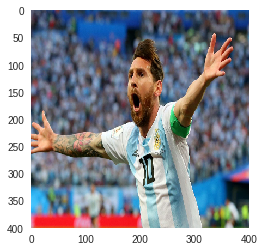

In [23]:
im = io.imread('sample_image.jpg')
im = cv2.resize(im, (400, 400))


plt.grid("off")
plt.imshow(im)

print im.shape

## Image Preprocessing

In [13]:
# Data preparation
data = im.reshape((-1, 3))
print data.shape

(160000, 3)


## Training K-Means 

In [14]:
km = KMeans(n_clusters=2)    
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Predicting Dominant Colour 

In [15]:
labels = km.predict(data)

In [16]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [17]:
new_pix = np.zeros_like(data)

for ix in range(new_pix.shape[0]):
    new_pix[ix, :] = km.cluster_centers_[labels[ix]].astype(np.uint8)

In [18]:
print labels[0]
print km.cluster_centers_[labels[0]] #.astype(np.uint8)
print km.cluster_centers_[labels[0]].astype(np.uint8)

0
[79.65179175 83.41951206 98.55859815]
[79 83 98]


##  Plotting images

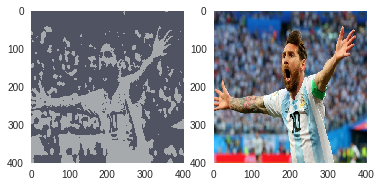

In [19]:

plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(new_pix.reshape(im.shape))

plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(im)

## Plotting Dominant Colours

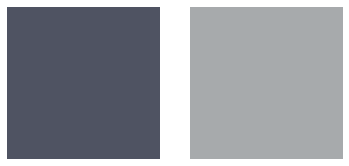

In [20]:
colors = km.cluster_centers_.astype(np.uint8)


for ix in range(colors.shape[0]):
    plt.subplot(1, colors.shape[0], ix+1)
    plt.grid("off")
    plt.xticks([])
    plt.yticks([])
    col = np.ones((100, 100, 3), dtype=np.uint8)
    col[:, :, :] = colors[ix]
    plt.imshow(col)

In [21]:
km.cluster_centers_

array([[ 79.65179175,  83.41951206,  98.55859815],
       [167.17160637, 170.63118553, 172.64538795]])